# DGEMM on JUWELS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline
sns.set(
    palette=sns.color_palette("Paired"),
    rc={
        "figure.figsize": (24, 10)
    },
    color_codes=False
)
from scipy.stats import linregress
SYSTEM="juwels"
DATADIR="../../data/"+SYSTEM+"/"
plt.rcParams['figure.figsize'] = [24, 10]  # Bug; needed to be set twice

In [2]:
plt.rcParams['figure.figsize'] = [24, 10]  # Bug; needed to be set twice

In [3]:
frequency = 2.7
turbofrequency = 2.7  # running with --disable-turbomode
sockets = 2
corespersocket = 24
flopspercycle = 32

singlecorepeak = 1 * turbofrequency * flopspercycle
theoreticalpeak= sockets * corespersocket * frequency * flopspercycle

def theoricalPeak(core):
    # Turbo Bost on one core
    if core == 1:
        return singlecorepeak
    else:
        return core * frequency * flopspercycle

# 2021-02-25

In [4]:
INPUT_FILE="skylake_2021-02-25.csv"
df = pd.read_csv(DATADIR+INPUT_FILE)
df

,jobid,systemname,numlib,error_code,runtime[s],nodes,taskspernode,threadspertask,NLAST,time[s],GFLOPS,GFLOPSpcore
0,3418330,juwels,BLIS/0.8,0,136.0,1,1,1,8000,13.2800,75.69422,77.1107
1,3418339,juwels,BLIS/0.8,0,139.0,1,1,24,19000,9.8512,1398.33130,58.0217
2,3418343,juwels,BLIS/0.8,0,180.0,1,1,48,24000,10.6860,2502.58886,53.9042
3,3418364,juwels,OpenBLAS/0.3.12,0,129.0,1,1,1,8000,12.4530,80.71640,82.2322
4,3418365,juwels,OpenBLAS/0.3.12,0,150.0,1,1,24,19000,10.6840,1072.96148,53.4989
5,3418373,juwels,OpenBLAS/0.3.12,0,197.0,1,1,48,24000,12.8530,1835.95638,44.8136
6,3418346,juwels,imkl/2020.4.304,0,132.0,1,1,1,8000,12.8320,77.56504,79.7997
7,3418351,juwels,imkl/2020.4.304,0,125.0,1,1,24,19000,8.6335,1590.26064,66.2051
8,3418357,juwels,imkl/2020.4.304,0,165.0,1,1,48,24000,9.1166,3086.01368,63.1812


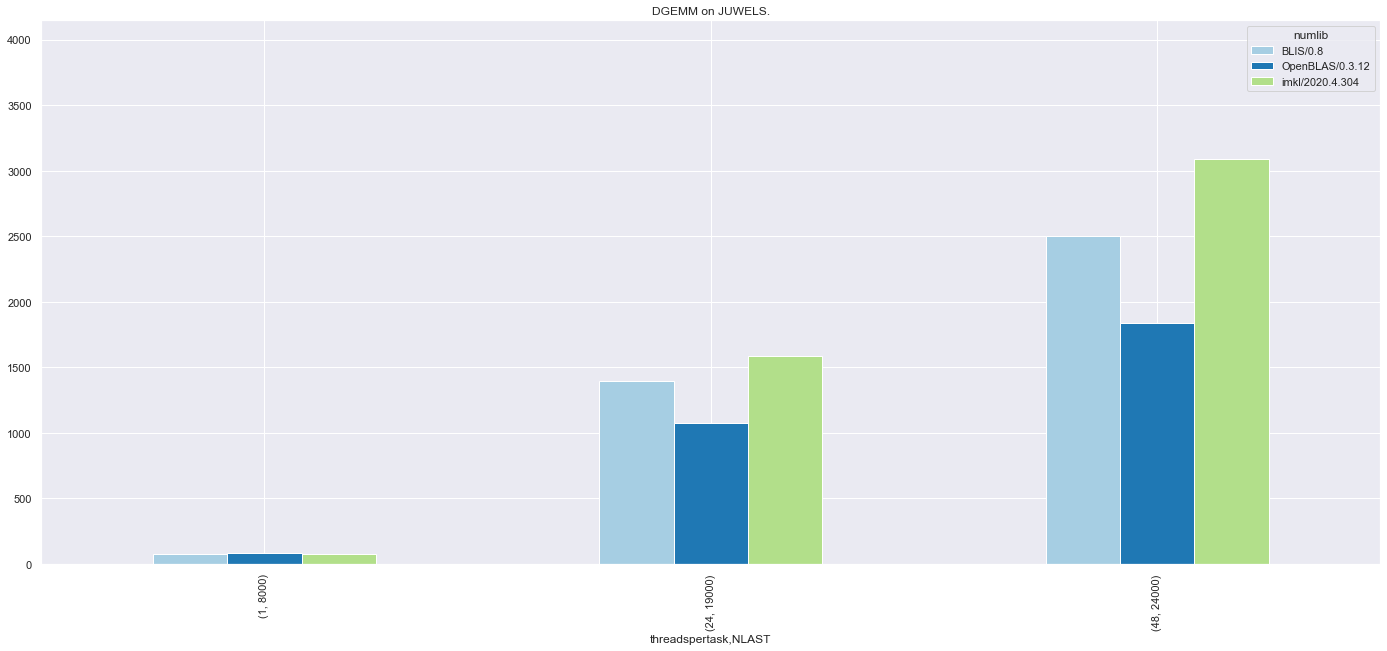

In [5]:
df.pivot_table(columns=["numlib"], index=["threadspertask","NLAST"], values="GFLOPS").plot(kind="bar", width=0.5, logy=False, title="DGEMM on JUWELS.",ylim=(0,theoreticalpeak));

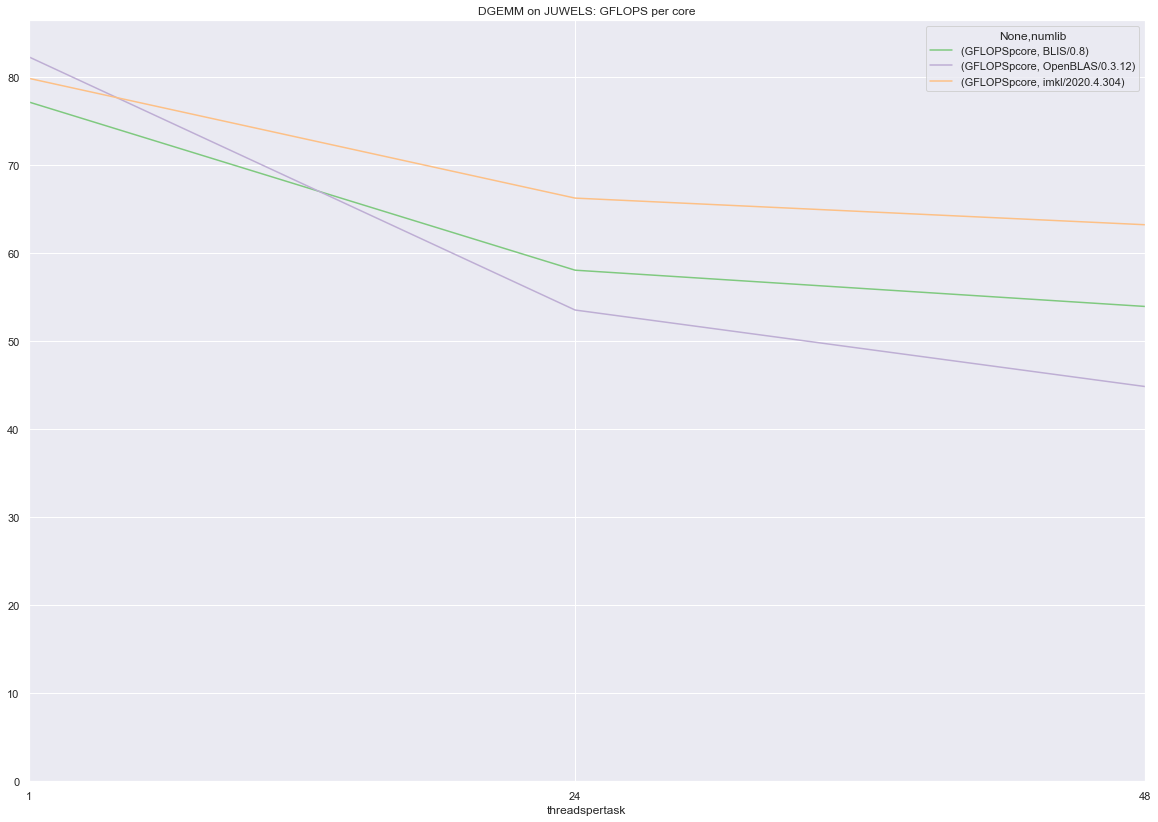

In [6]:
%matplotlib inline
sns.set(palette=sns.color_palette("Accent"))
plt.rcParams['figure.figsize'] = [20, 14]
table=df.pivot_table(columns=["numlib"],index=["threadspertask"], values=["GFLOPSpcore"])
plot=table.plot(kind="line", logy=False, title="DGEMM on JUWELS: GFLOPS per core");
plot.set_ylim(0,singlecorepeak)
plot.set_xticks([1,24,48])

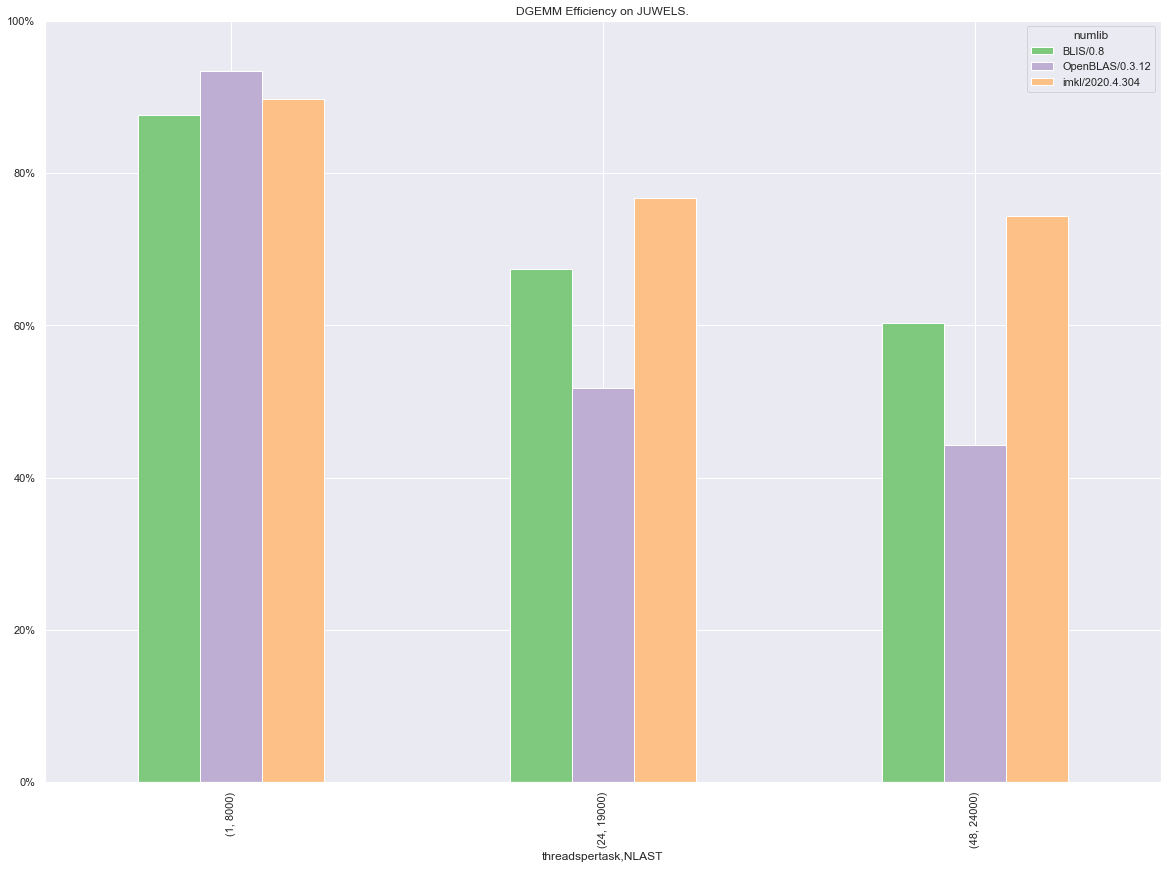

In [7]:
df['theoricalPeak'] = [theoricalPeak(int(x)) for x in df[['threadspertask']].values]
df['Efficiency'] = df.GFLOPS / df.theoricalPeak * 100

ax = df.pivot_table(columns=["numlib"], index=["threadspertask","NLAST"], values="Efficiency").plot(kind="bar", width=0.5, logy=False, title="DGEMM Efficiency on JUWELS.",ylim=(0,100));
ax.yaxis.set_major_formatter(mtick.PercentFormatter())